## Filter Data
Now we will filter our data. For this we'll merge our 3 dataframes. We will left join, because there are authors in the authors dataframe which do not have any title/chapter in the other dataframes.

In [1]:
import pandas as pd

In [2]:
chapters = pd.read_csv('data/chapters.csv')
authors = pd.read_csv('data/authors.csv')
titles = pd.read_csv('data/titles.csv')

In [3]:
df = (chapters.merge(titles, on='title_url', how='left')
      .merge(authors, on='author_url', how='left')
     )

In [4]:
df.head()

title_url  chapter_num  \
0  /gellert/comoedia/comoedia.html            0   
1  /gellert/comoedia/comoedia.html            1   
2  /gellert/comoedia/comoedia.html            2   
3  /gellert/zschwest/zschwest.html            0   
4  /gellert/zschwest/zschwest.html            1   

                                             chapter author_url  \
0  Man hat zu unsern Zeiten, besonders in Frankre...    gellert   
1  Ich komme nunmehr auf den zweiten Einwurf. Rüh...    gellert   
2  Bei jeder Erdichtung nemlich verursacht nicht ...    gellert   
3  CleonDer Magister, sein BruderLottchen, Cleons...    gellert   
4  Cleon. Lottchen.Lottchen. Lieber Papa, Herr Da...    gellert   

                       title  year                         author  born  died  
0    Pro comoedia commovente  1751  Christian Fürchtegott Gellert  1715  1769  
1    Pro comoedia commovente  1751  Christian Fürchtegott Gellert  1715  1769  
2    Pro comoedia commovente  1751  Christian Fürchtegott Gellert  1715  1769  
3  Die zärtlichen Schwestern  1747  Christian Fürchtegott Gellert  1715  1769  
4  Die zärtlichen Schwestern  1747  Christian Fürchtegott Gellert  1715  1769

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37313 entries, 0 to 37312
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title_url    37313 non-null  object
 1   chapter_num  37313 non-null  int64 
 2   chapter      36682 non-null  object
 3   author_url   37313 non-null  object
 4   title        37313 non-null  object
 5   year         36708 non-null  object
 6   author       37313 non-null  object
 7   born         37313 non-null  int64 
 8   died         37313 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


We see that some chapters do not contain any values. This might be due to some illustrations or different html-structures. 

In [6]:
df = df.loc[~df.chapter.isna()]

In [7]:
df.loc[df.year.isna()].head()

title_url  chapter_num  \
6678  /diderot/rameaus/rameaus.html            0   
6679  /diderot/rameaus/rameaus.html            1   
6680  /diderot/rameaus/rameaus.html            2   
6681  /diderot/rameaus/rameaus.html            3   
7217   /lenz/empfinds/empfinds.html            0   

                                                chapter author_url  \
6678  Mit Zeichnungen von Antoine Watteau»Rameaus Ne...     goethe   
6679  Es mag schön oder häßlich Wetter sein, meine G...     goethe   
6680  Der Übersetzer hatte sich vorgenommen, die Per...     goethe   
6681  Nachdem die französische Übersetzung des Dider...     goethe   
7217                                        oder \n\n         lenz   

                            title year                      author  born  died  
6678                Rameaus Neffe  NaN  Johann Wolfgang von Goethe  1749  1832  
6679                Rameaus Neffe  NaN  Johann Wolfgang von Goethe  1749  1832  
6680                Rameaus Neffe  NaN  Johann Wolfgang von Goethe  1749  1832  
6681                Rameaus Neffe  NaN  Johann Wolfgang von Goethe  1749  1832  
7217  Empfindsamster aller Romane  NaN                  Jakob Lenz  1751  1792

Also some of the rows do not have a year-value. After looking into it, a possible reason is that the metadata for 'firstpub' exists, but only consists of an empty string. We can tweak the data collection code for this later.

In [8]:
df = df.loc[~df.year.isna()]

In some collections (often collections of poems) there are title pages where 'Projekt Gutenberg' is mentioned. This doesn't belong to the original book.

In [9]:
df = df.loc[~df.chapter.str.contains('Projekt Gutenberg')]

For the first iteration it is enough for us to consider books where the year of first publishment was already given in the metadata of the webpage. We assigned the values 0 (for missing firstpub-data / or data in the wrong format) and 2 (url status_code different from 200) to titles with missing years.

Because of some missing years, we first have to convert the year-data into integer values.

In [10]:
#df['year'] = pd.to_numeric(df['year'])

We are unable to do so, because some strings are of the form 
- '1800-1801' or
- '1778/79' or
- '1854/1855'. 
To keep things simple, we will just keep the first numbers (first 4 characters).

In [11]:
df.loc[df.year.str.len() >4].sample(50)

title_url  chapter_num  \
7875     /herder/volklied/volklied.html           83   
7794     /herder/volklied/volklied.html            2   
31833   /freytag/dvergang/dvergang.html           52   
7949     /herder/volklied/volklied.html          157   
29223     /gutzkow/zauber2/zauber2.html            0   
27894  /gotthelf/geltstag/geltstag.html            9   
28281  /gotthelf/annebae2/annebae2.html            2   
37036     /musil/mannohn3/mannohn3.html           31   
37019     /musil/mannohn3/mannohn3.html           14   
29309     /gutzkow/zauber8/zauber8.html            2   
33281    /keller/heinric1/heinric1.html           13   
36876     /musil/mannohne/mannohne.html           34   
27892  /gotthelf/geltstag/geltstag.html            7   
29247     /gutzkow/zauber3/zauber3.html           12   
7799     /herder/volklied/volklied.html            7   
29310     /gutzkow/zauber8/zauber8.html            3   
1617    /wieland/aristipp/aristipp.html           38   
7877     /herder/volklied/volklied.html           85   
7954     /herder/volklied/volklied.html          162   
7647     /herder/humanita/humanita.html            5   
28260  /gotthelf/annebae1/annebae1.html            6   
31789   /freytag/dvergang/dvergang.html            8   
7910     /herder/volklied/volklied.html          118   
31829   /freytag/dvergang/dvergang.html           48   
1718    /wieland/aristipp/aristipp.html          139   
7798     /herder/volklied/volklied.html            6   
1600    /wieland/aristipp/aristipp.html           21   
33305    /keller/heinric1/heinric1.html           37   
1696    /wieland/aristipp/aristipp.html          117   
7922     /herder/volklied/volklied.html          130   
1652    /wieland/aristipp/aristipp.html           73   
29281     /gutzkow/zauber5/zauber5.html           20   
29259     /gutzkow/zauber4/zauber4.html           10   
7909     /herder/volklied/volklied.html          117   
28279  /gotthelf/annebae2/annebae2.html            0   
36920     /musil/mannohne/mannohne.html           78   
28255  /gotthelf/annebae1/annebae1.html            1   
4733     /goethe/dichwah2/dichwah2.html            9   
1622    /wieland/aristipp/aristipp.html           43   
36858     /musil/mannohne/mannohne.html           16   
7911     /herder/volklied/volklied.html          119   
37013     /musil/mannohn3/mannohn3.html            8   
28298  /gotthelf/annebae2/annebae2.html           19   
1603    /wieland/aristipp/aristipp.html           24   
7833     /herder/volklied/volklied.html           41   
7834     /herder/volklied/volklied.html           42   
29271     /gutzkow/zauber5/zauber5.html           10   
2721    /wieland/gedicht2/gedicht2.html            4   
36965     /musil/mannohne/mannohne.html          123   
1619    /wieland/aristipp/aristipp.html           40   

                                                 chapter author_url  \
7875   Französisch.Das erste Lied ist von Fenelon: da...     herder   
7794   Deutsch.Aus dem Munde des Volks in Elsaß. Die ...     herder   
31833  (1790)Verschiedene Grundlagen für Sittlichkeit...    freytag   
7949   Spanisch.Obras de Gongora p. –Alle Töchter der...     herder   
29223  Den Strom zu nennen, auf dem soeben ein in ers...    gutzkow   
27894  Wenn auf dem Meere der Sturm beginnt, eine sch...   gotthelf   
28281  Seltsam war es am Morgen Meyeli zumute, als es...   gotthelf   
37036  Fühlen und Verhalten. Die Unsicherheit des Gef...      musil   
37019  Gespräche über Liebe Der Mensch, recht eigentl...      musil   
29309  Eines Winterabends herrschte auf Schloß Bex ei...    gutzkow   
33281  Ich konnte den unbestimmten Zwischenzustand nu...     keller   
36876  Ein heißer Strahl und erkaltete Wände Als Ulri...      musil   
27892  Es ging Steffens Wirtshaus wie allem Neuen, es...   gotthelf   
29247  Konnte nun aber wol auch Armgart zu den Ungedu...    gutzkow   
7799   Englisch.Aus den Reliq. of anc. Poetr. Vol. I....     herder   
29310  Im Widerspruch mit dem im gold

In [12]:
df.loc[df.year.str.len() > 4, 'year'] = df.loc[df.year.str.len() > 4, 'year'].str[:4]
df['year'] = pd.to_numeric(df['year'])

In [13]:
df = df.loc[df.year > 10]

Unfortunately this was quite a chunk. But we can come back to the year in the second iteration.

As we only care for the first publishment year, we will only consider publishments when the author was still alive, i.e. 'born' < 'year' < 'died'. Otherwise it is too likely that we have a later edition or a collection of works.

In [14]:
df = df.loc[(df.born < df.year) & (df.year < df.died)]

Lastly, we check for duplicates that might have emerged from merging the dataframes.

In [15]:
df.duplicated().sum() #that hurt

9237

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
cols = ['title', 'author', 'chapter', 'year', 'chapter_num', 'title_url', 'author_url', 'born', 'died']
df = df[cols]

In [18]:
df.duplicated(subset = 'chapter').sum()
df = df.drop_duplicates(subset='chapter')

In [19]:
df.to_csv('data/df_filtered.csv', index=False)

# Second iteration


In [1]:
import pandas as pd

In [3]:
chapters = pd.read_csv('data/chapters_2nd.csv')
titles = pd.read_csv('data/titles_2nd.csv')
authors = pd.read_csv('data/authors_2nd.csv')

In [70]:
df = (chapters.merge(titles, on='title_url', how='left')
      .merge(authors, on='author_url', how='left')
     )

In [71]:
df.isna().sum()

title_url        0
chapter_num      0
chapter        923
author_url       0
title            0
year             0
author           0
born             0
died             0
dtype: int64

In [72]:
df = df.loc[~df.chapter.isna()]

In [73]:
df = df.loc[~df.chapter.str.contains('Projekt Gutenberg')]

### Imputing years
This might be a task for an API, but because of a hard limit on the calls I'll probably impute some dates from time to time manually.
For now we'll remove the titles without a proper year.

In [74]:
df.loc[(df.year == 'o.J.')&(df.author_url == 'zweig'), 'year'] = 1904

In [75]:
df = df.loc[~(df.year == 'o.J.')]

In [76]:
df['year'] = pd.to_numeric(df['year'])

#### Stefan Zweig

In [77]:
df.loc[(df.author_url == 'zweig') & (df.title == 'Amok'), 'year'] = 1922
df.loc[(df.author_url == 'zweig') & (df.title == 'Die unsichtbare Sammlung'), 'year'] = 1925
df.loc[(df.author_url == 'zweig') & (df.title == 'Erstes Erlebnis'), 'year'] = 1911
df.loc[(df.author_url == 'zweig') & (df.title == 'Marceline Desbordes-Valmore'), 'year'] = 1920
df.loc[(df.author_url == 'zweig') & (df.title == 'Reise nach Rußland'), 'year'] = 1928
df.loc[(df.author_url == 'zweig') & (df.title == 'Sternstunden der Menschheit'), 'year'] = 1927
df.loc[(df.author_url == 'zweig') & (df.title == 'Silberne Saiten'), 'year'] = 1901
df.loc[(df.author_url == 'zweig') & (df.title == 'Die frühen Kränze'), 'year'] = 1906

#### Gottfried August Bürger

In [79]:
df.loc[(df.author_url == 'buerger') &(df.title == 'Gedichte'), 'year'] = 1778

#### Ludwig Tieck

In [82]:
df.loc[(df.year < 10) &(df.author_url == 'tieck')].title.unique()

array(['Das Jüngste Gericht',
       'Leben des berühmten Kaisers Abraham Tonelli', 'Der Abschied',
       'Der Aufzug der Romanze', 'Fortunat', 'Einzelne Gedichte',
       'Gedichte', 'Coriolanus', 'Cymbeline', 'Macbeth',
       'Chronologie der Werke Tiecks', 'Über Leben und Werk Tiecks'],
      dtype=object)

In [81]:
df.loc[(df.author_url == 'tieck') & (df.title == 'Des Lebens Überfluß'), 'year'] = 1839
df.loc[(df.author_url == 'tieck') & (df.title == 'Das Fest zu Kenelworth'), 'year'] = 1828
df.loc[(df.author_url == 'tieck') & (df.title == 'Pietro von Abano'), 'year'] = 1825
df.loc[(df.author_url == 'tieck') & (df.title == 'Tod des Dichters'), 'year'] = 1834
df.loc[(df.author_url == 'tieck') & (df.title == 'Leben und Tod der heiligen Genoveva'), 'year'] = 1821
df.loc[(df.author_url == 'tieck') & (df.title == 'Frauendienst'), 'year'] = 1812
df.loc[(df.author_url == 'tieck') & (df.title == 'Tod des Dichters'), 'year'] = 1792

#### Wilhelm Raabe

In [85]:
df.loc[(df.year < 10) &(df.author_url == 'raabe')].title.unique()

array(['Christoph Pechlin', 'Das letzte Recht', 'Der Dräumling',
       'Der gute Tag', 'Der Marsch nach Hause', 'Des Reiches Krone',
       'Die Gänse von Bützow', 'Die Innerste',
       'Die Kinder von Finkenrode', 'Eine Grabrede aus dem Jahr 1609',
       'Eulenpfingsten', 'Fabian und Sebastian', 'Gedelöcke',
       'Gutmanns Reisen', 'Kloster Lugau',
       'Meister Autor oder Die Geschichten vom versunkenen Garten',
       'Sankt Thomas', 'Prinzessin Fisch', 'Unruhige Gäste',
       'Verworrenes Leben. Novellen und Skizzen', 'Vom alten Proteus'],
      dtype=object)

In [87]:
df.loc[(df.author_url == 'raabe') & (df.title == 'Christoph Pechlin'), 'year'] = 1873
df.loc[(df.author_url == 'raabe') & (df.title == 'Das letzte Recht'), 'year'] = 1862
df.loc[(df.author_url == 'raabe') & (df.title == 'Der Dräumling'), 'year'] = 1872
df.loc[(df.author_url == 'raabe') & (df.title == 'Der Marsch nach Hause'), 'year'] = 1870
df.loc[(df.author_url == 'raabe') & (df.title == 'Des Reiches Krone'), 'year'] = 1873
df.loc[(df.author_url == 'raabe') & (df.title == 'Die Gänse von Bützow'), 'year'] = 1906
df.loc[(df.author_url == 'raabe') & (df.title == 'Die Innerste'), 'year'] = 1876
df.loc[(df.author_url == 'raabe') & (df.title == 'Die Kinder von Finkenrode'), 'year'] = 1859
df.loc[(df.author_url == 'raabe') & (df.title == 'Eine Grabrede aus dem Jahr 1609'), 'year'] = 1862
df.loc[(df.author_url == 'raabe') & (df.title == 'Eulenpfingsten'), 'year'] = 1908
df.loc[(df.author_url == 'raabe') & (df.title == 'Fabian und Sebastian'), 'year'] = 1882
df.loc[(df.author_url == 'raabe') & (df.title == 'Gedelöcke'), 'year'] = 1866
df.loc[(df.author_url == 'raabe') & (df.title == 'Gutmanns Reisen'), 'year'] = 1892
df.loc[(df.author_url == 'raabe') & (df.title == 'Kloster Lugau'), 'year'] = 1894
df.loc[(df.author_url == 'raabe') & (df.title == 'Meister Autor oder Die Geschichten vom versunkenen Garten'), 'year'] = 1874
df.loc[(df.author_url == 'raabe') & (df.title == 'Sankt Thomas'), 'year'] = 1866
df.loc[(df.author_url == 'raabe') & (df.title == 'Prinzessin Fisch'), 'year'] = 1883
df.loc[(df.author_url == 'raabe') & (df.title == 'Verworrenes Leben. Novellen und Skizzen'), 'year'] = 1862
df.loc[(df.author_url == 'raabe') & (df.title == 'Vom alten Proteus'), 'year'] = 1879

### Removing chapters without years

In [88]:
df = df.loc[df.year > 10]

Additionally we'll remove those chapters that have its' year after the death of the author. This hints at a later edition. Of course it may be that some titles were released after the authors' death, but we'll ignore this for now.

In [91]:
df = df.loc[(df.born < df.year) & (df.year < df.died)]

In [127]:
df.duplicated().sum()

11016

In [128]:
df = df.drop_duplicates()

In [136]:
df.author_url.value_counts().head(20)

wieland     1372
jeanpaul    1334
fontane     1034
tieck        951
raabe        907
brentano     831
arnim        809
hauptmag     710
heine        606
goethe       563
zweig        512
dauthend     479
gotthelf     435
reuter       428
dehmel       428
freytag      410
gutzkow      376
immerman     370
heyse        286
rilke        275
Name: author_url, dtype: int64

In [137]:
df.author_url.nunique()

87

One can see that very few authors make up for a lot of the chapters. For example: The first 5 authors make a quarter of the chapters. This should change and has to be considered when using a subset of the chapters for training and testing.
A positive thing to note: this time we have more than double the amount of authors compared to the first iteration.
A few of the authors collected didn't make it into this dataframe. Looking at the respective projekt-gutenberg entries could help finding the issue.

In [145]:
missing_authors = []
for a in authors.author_url.unique():
    if a not in df.author_url.unique():
        missing_authors.append(a)
missing_authors

['boerne',
 'brockes',
 'diderot',
 'ganghofe',
 'grubeaw',
 'guenther',
 'hagedorn',
 'hesse',
 'iffland',
 'klopstoc',
 'langbehn',
 'ludwig',
 'platen',
 'polenz',
 'schefer',
 'schubart',
 'schulzea',
 'sohnrey',
 'uhland',
 'viebig']

At first glance there is nothing unusual (except for Hermann Hesse: his works will be free of copyright in 2033). So it probably was because of the publishing year. Imputing these values might be worth it. Some front pages look like this:

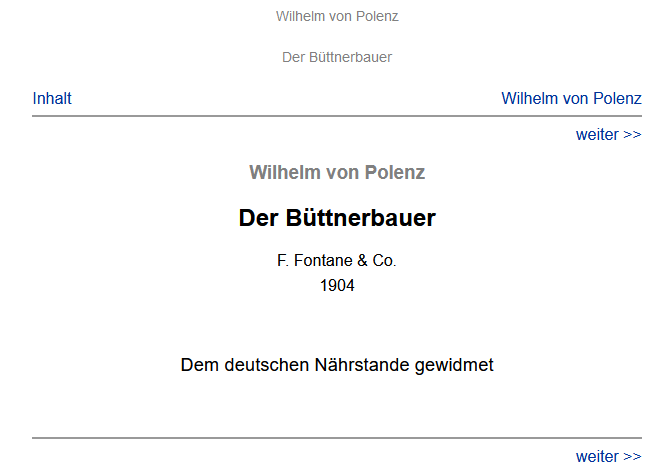

So we might be able to get some more years without imputing them manually.

In [139]:
authors.author_url.unique()

array(['anzengru', 'arnim', 'arnimb', 'bodmer', 'boerne', 'brentano',
       'brockes', 'buechner', 'buerger', 'chamisso', 'dauthend', 'dehmel',
       'diderot', 'droste', 'ebnresch', 'eichndrf', 'fontane', 'franzos',
       'freiligr', 'frenssen', 'freytag', 'ganghofe', 'gellert', 'george',
       'goethe', 'gotthelf', 'gottschj', 'grillprz', 'grubeaw',
       'guenther', 'gutzkow', 'hagedorn', 'hamann', 'hauff', 'hauptmag',
       'hebbel', 'heine', 'herder', 'herwegh', 'hesse', 'heyse',
       'etahoff', 'hofmanns', 'hoelderl', 'holz', 'iffland', 'immerman',
       'jeanpaul', 'kafka', 'keller', 'keyserlg', 'kleist', 'klinger',
       'klopstoc', 'laroche', 'langbehn', 'laube', 'leisewiz', 'lenau',
       'lenz', 'lessing', 'lichtenb', 'liliencr', 'loens', 'ludwig',
       'mannh', 'cfmeyer', 'moerike', 'moritz', 'muellerw', 'musil',
       'nestroy', 'nicolai', 'novalis', 'platen', 'polenz', 'raabe',
       'raimund', 'reuter', 'reuterga', 'rilke', 'rosegger', 'rueckert',
       '

## Categorization into decades and first data analysis
Now that we indeed have only number in our year column, it is easy to create a new decade column.

In [92]:
df['decade'] = df['year'].apply(lambda x: str(x)[:3] + '0s')

In [129]:
df.decade.describe()

count     20309
unique       22
top       1800s
freq       2568
Name: decade, dtype: object

In [130]:
df.decade.value_counts()

1800s    2568
1790s    1686
1900s    1367
1850s    1344
1770s    1300
1820s    1291
1830s    1136
1870s    1082
1890s    1061
1840s    1047
1880s    1035
1910s    1018
1860s     875
1930s     766
1920s     631
1810s     621
1780s     545
1760s     531
1740s     184
1940s     113
1750s     102
1730s       6
Name: decade, dtype: int64

We have 22 different decades. It is nice to see that all but 4 decades consist of more than 500 chapters. Luckily these decades lie on the edge of our timeframe. I'm sure this result can be improved by imputing more values for the years.

In [94]:
from matplotlib import pyplot as plt

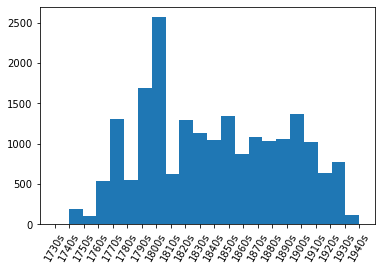

In [131]:
plt.hist(df['decade'].sort_values(), bins=22)
plt.xticks(rotation = 60)
plt.show()


In [107]:
import seaborn as sns

In [118]:
df['ch_len'] = df.chapter.apply(lambda x: len(x))

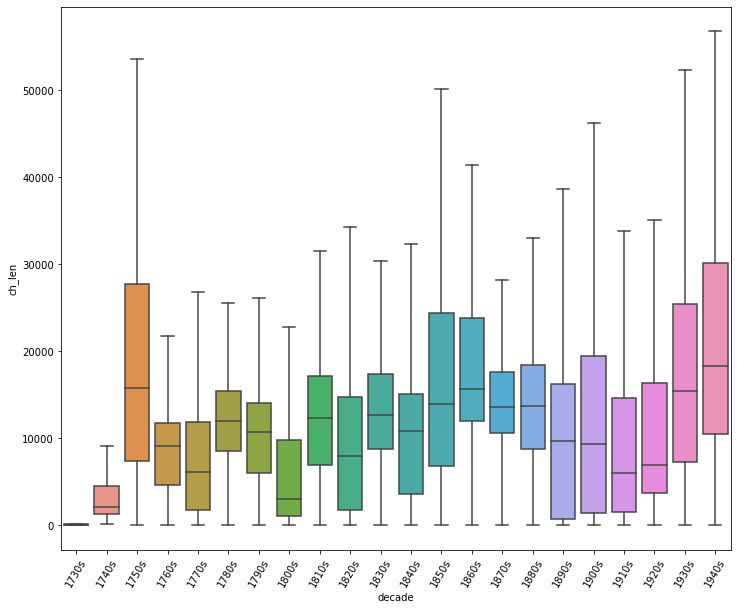

In [132]:
fig, ax = plt.subplots(figsize = (12,10))
sns.boxplot(data = df.sort_values('decade'), x = "decade", y = "ch_len", showfliers=False)
plt.xticks(rotation=60)
plt.show()

In [133]:
df.loc[df.decade == '1730s']

title_url  chapter_num  \
12774  /gottschj/cato/cato.html            0   
12775  /gottschj/cato/cato.html            1   
12776  /gottschj/cato/cato.html            2   
12777  /gottschj/cato/cato.html            3   
12778  /gottschj/cato/cato.html            4   
12779  /gottschj/cato/cato.html            5   

                                                 chapter author_url  \
12774  Der Schauplatz ist in einem Saale des festen S...   gottschj   
12775  Ich unterstehe mich, eine Tragödie in Versen d...   gottschj   
12776                        (Ende der ersten Handlung.)   gottschj   
12777                        (Ende der andern Handlung.)   gottschj   
12778                       (Ende der dritten Handlung.)   gottschj   
12779                       (Ende der vierten Handlung.)   gottschj   

                 title  year                      author  born  died decade  \
12774  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   
12775  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   
12776  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   
12777  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   
12778  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   
12779  Sterbender Cato  1732  Johann Christoph Gottsched  1700  1766  1730s   

       ch_len  
12774     217  
12775   28236  
12776      27  
12777      27  
12778      28  
12779      28

## Filtering chapters

In [147]:
df.ch_len.describe()

count     20309.000000
mean      13228.379684
std       18020.360703
min           1.000000
25%        3275.000000
50%       10474.000000
75%       15830.000000
max      544455.000000
Name: ch_len, dtype: float64

Our plan for now is to start tokenize and then filter some more chapters based on the amount of words written in these. Chapter with a small amount of words might be just title pages which do not hold real value for us.

In [150]:
from nltk import word_tokenize, FreqDist

In [184]:
df['tokens'] = df.chapter.apply(lambda x: word_tokenize(x, language='german'))

C:\Users\muell\AppData\Local\Temp/ipykernel_18132/89706465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df.chapter.apply(lambda x: word_tokenize(x, language='german'))


In [185]:
df['tokens'] = df.tokens.apply(lambda x: [word for word in x if word.isalpha()])

C:\Users\muell\AppData\Local\Temp/ipykernel_18132/2644815650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df.tokens.apply(lambda x: [word for word in x if word.isalpha()])


In [186]:
df['chapter'] = df.tokens.apply(lambda x: ' '.join(x))

C:\Users\muell\AppData\Local\Temp/ipykernel_18132/460532984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chapter'] = df.tokens.apply(lambda x: ' '.join(x))


In [191]:
df['lemma'] = df.chapter.apply(lambda ch: [word.lemma_ for word in nlp(ch)])

C:\Users\muell\AppData\Local\Temp/ipykernel_18132/2292678546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemma'] = df.chapter.apply(lambda ch: [word.lemma_ for word in nlp(ch)])


In [204]:
df.to_csv('data/df_lemmatized.csv', index=False)

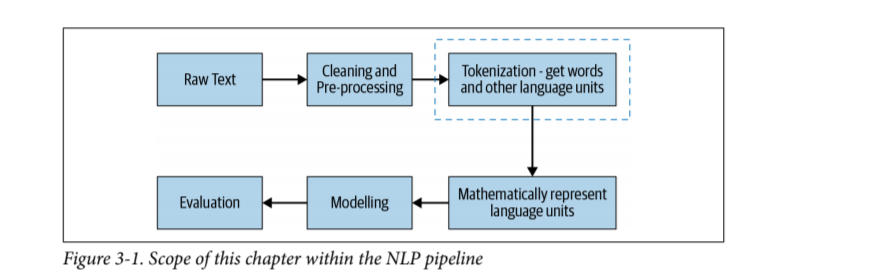

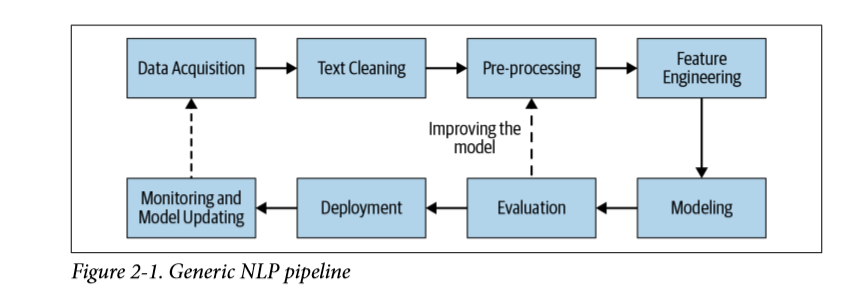

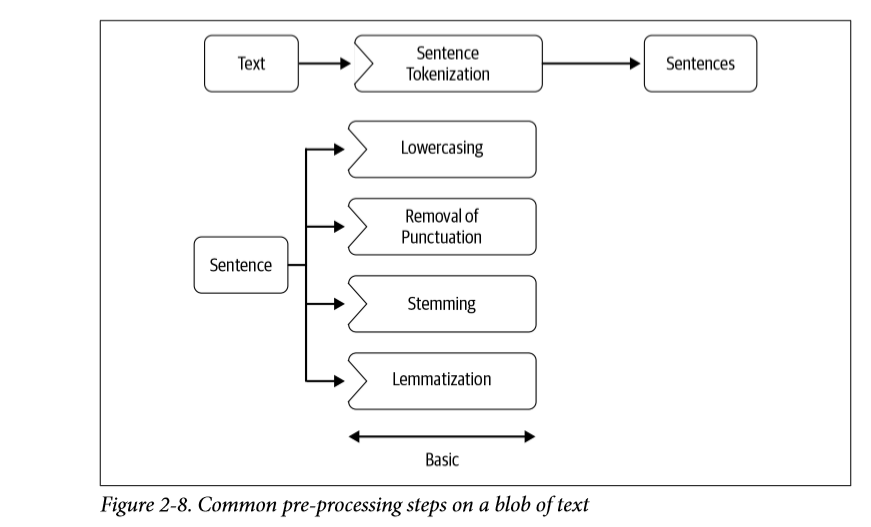

In [163]:
import spacy

In [164]:
nlp=spacy.load('de_core_news_lg')

In [9]:
import matplotlib.pyplot as plt# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

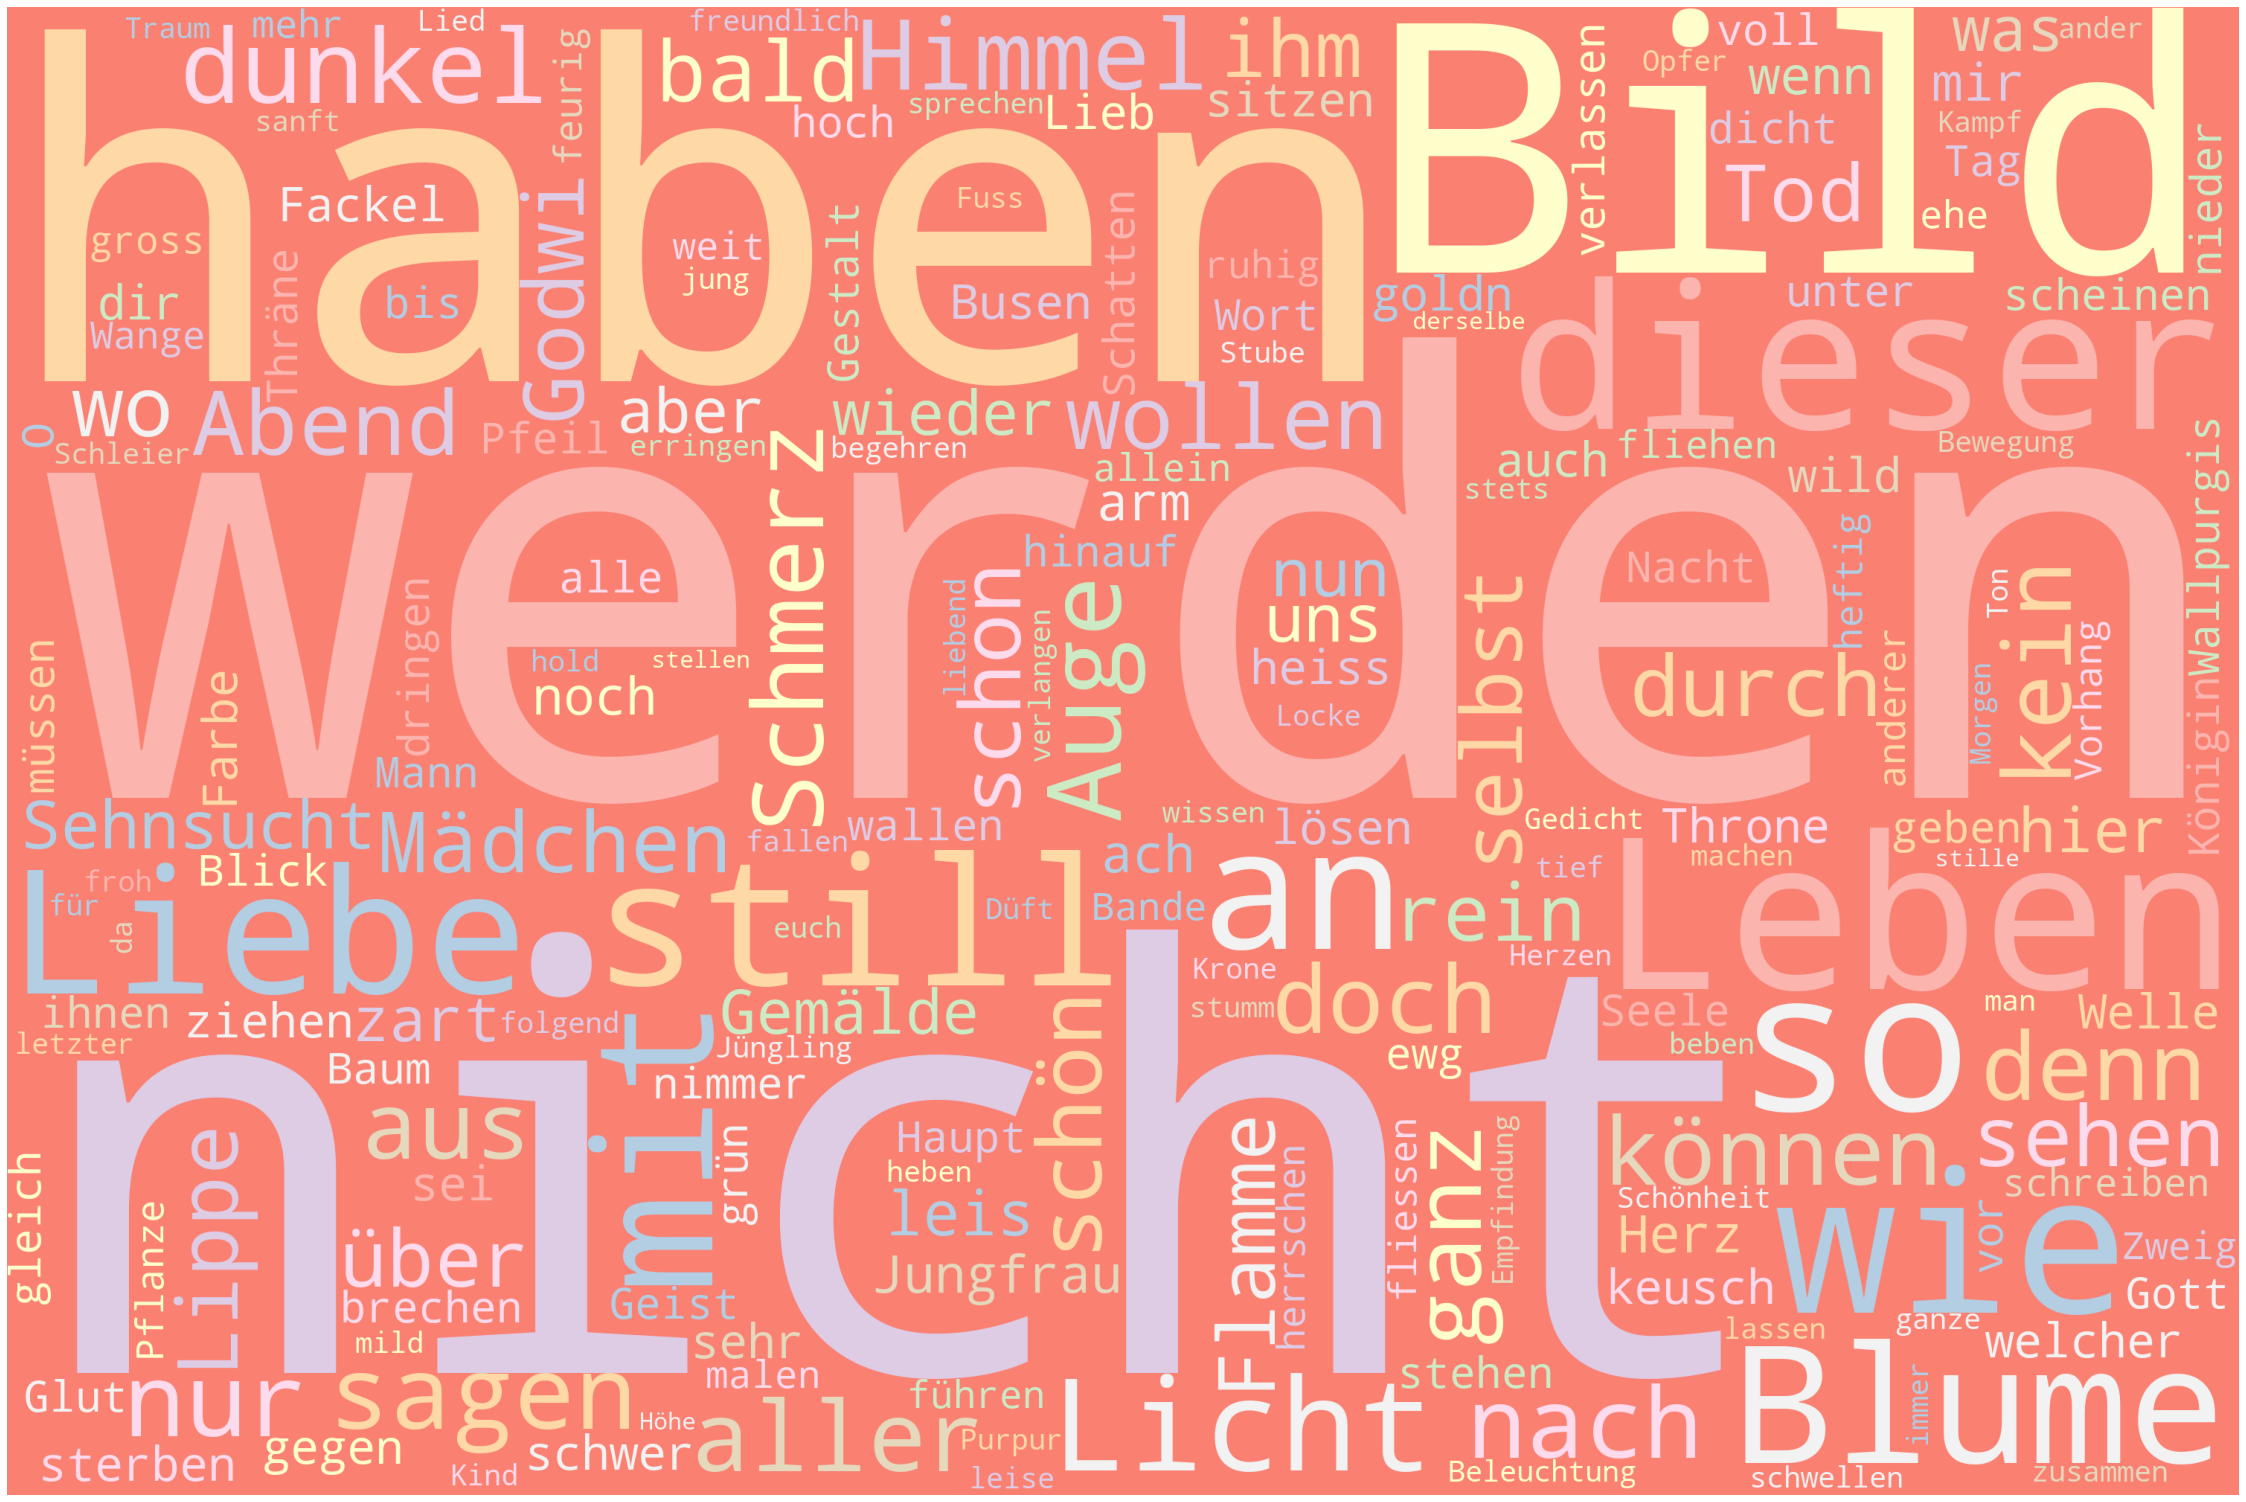

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(width= 3000,
                      height = 2000,
                      random_state=1,
                      background_color='salmon',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = stopwords).generate(test)# Plot
plot_cloud(wordcloud)

In [1]:
import pandas as pd

In [70]:
df = pd.read_csv('data/df_lemmatized.csv')

In [72]:
df = df.drop(columns = ['tokens'])

The lemma list does not get recognized. Instead it treats it as a string...therefore problems with wordcloud arise. To solve this problem we'll import the literal_eval method from the package Abstract Syntax Trees.

In [42]:
from ast import literal_eval

In [71]:
df['lemma'] = df['lemma'].apply(lambda x: literal_eval(x))
df['tokens'] = df['tokens'].apply(lambda x: literal_eval(x))

KeyboardInterrupt: 

Let's just get some basic information abou the effectiveness of lemmatization and then drop the tokens column.

In [73]:
#token_list = []
lemma_list = []
for row in df.itertuples(index=False):
   # token_list.extend(row.tokens)
    lemma_list.extend(row.lemma)
    

In [ ]:
len(token_list)

In [74]:
len(lemma_list)

40818862

We have 40 million words

In [75]:
from nltk import FreqDist

In [78]:
#fdist_token = FreqDist(token_tilst)
fdist_lemma = FreqDist(lemma_list)
print(len(fdist_lemma)) #'Number tokens: ' len(fdist_token) )

629145


We have 629145 different lemmas

In [88]:
most_common_words = []
mc = fdist_lemma.most_common(1000)
for i in range(1000):
    most_common_words.append(mc[i][0])

In [105]:
stopwords_most_common = [word for word in most_common_words if word.islower()]

In [46]:
df_1730s = df.loc[df.decade == '1730s']

In [47]:
lemma_1730 = []
for lemma in df_1730s.lemma:
    lemma_1730.extend(lemma)

In [52]:
stopwords = ['der', 'dass', 'und', 'zu', 'von', 'auf', 'um',
             'ich', 'du', 'er', 'sie', 'es', 'wir', 'ihr',
             'sich', 'sein', 'mein', 'dein', 'dich', 'mich',
             'als', 'in', 'ein', 'an', 'so', 'dieser']

In [57]:
#import nltk
from nltk.corpus import stopwords
#nltk.download()
german_stopwords = stopwords.words('german')

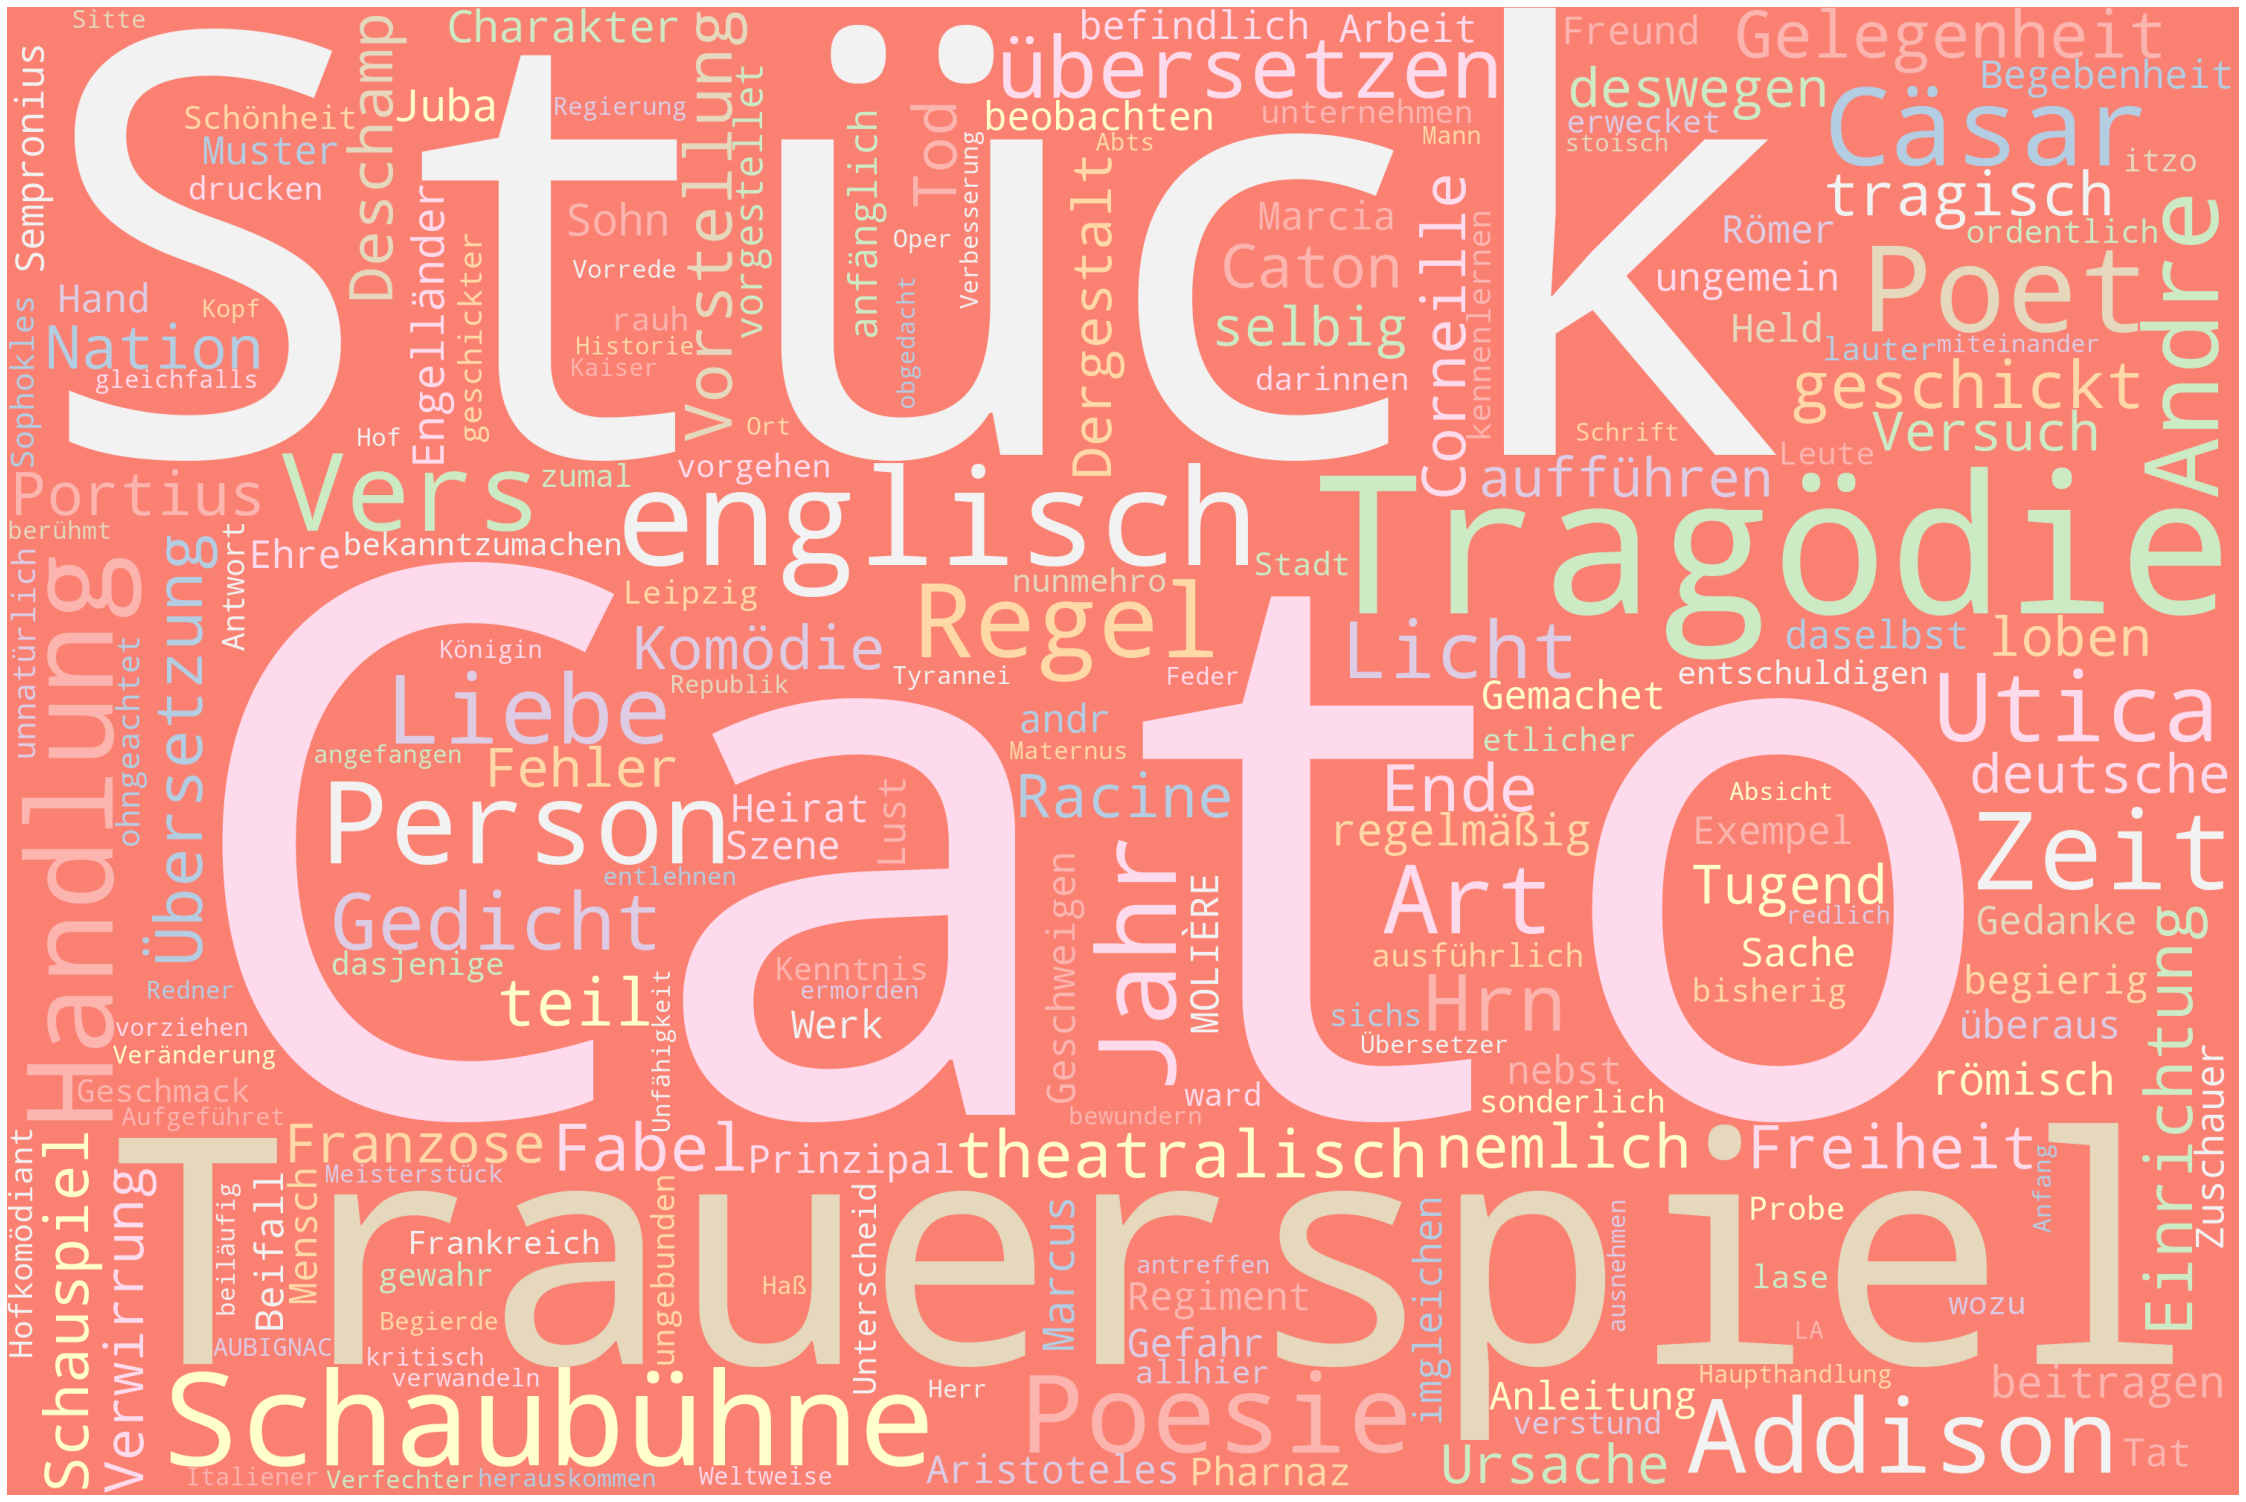

In [106]:
from wordcloud import WordCloud
wordcloud = WordCloud(width= 3000,
                      height = 2000,
                      random_state=1,
                      background_color='salmon',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = stopwords_most_common
                     ).generate(' '.join(lemma_1730))# Plot
plot_cloud(wordcloud)

In [59]:
df_1800s = df.loc[df.decade == '1800s']

In [60]:
lemma_1800 = []
for lemma in df_1800s.lemma:
    lemma_1800.extend(lemma)

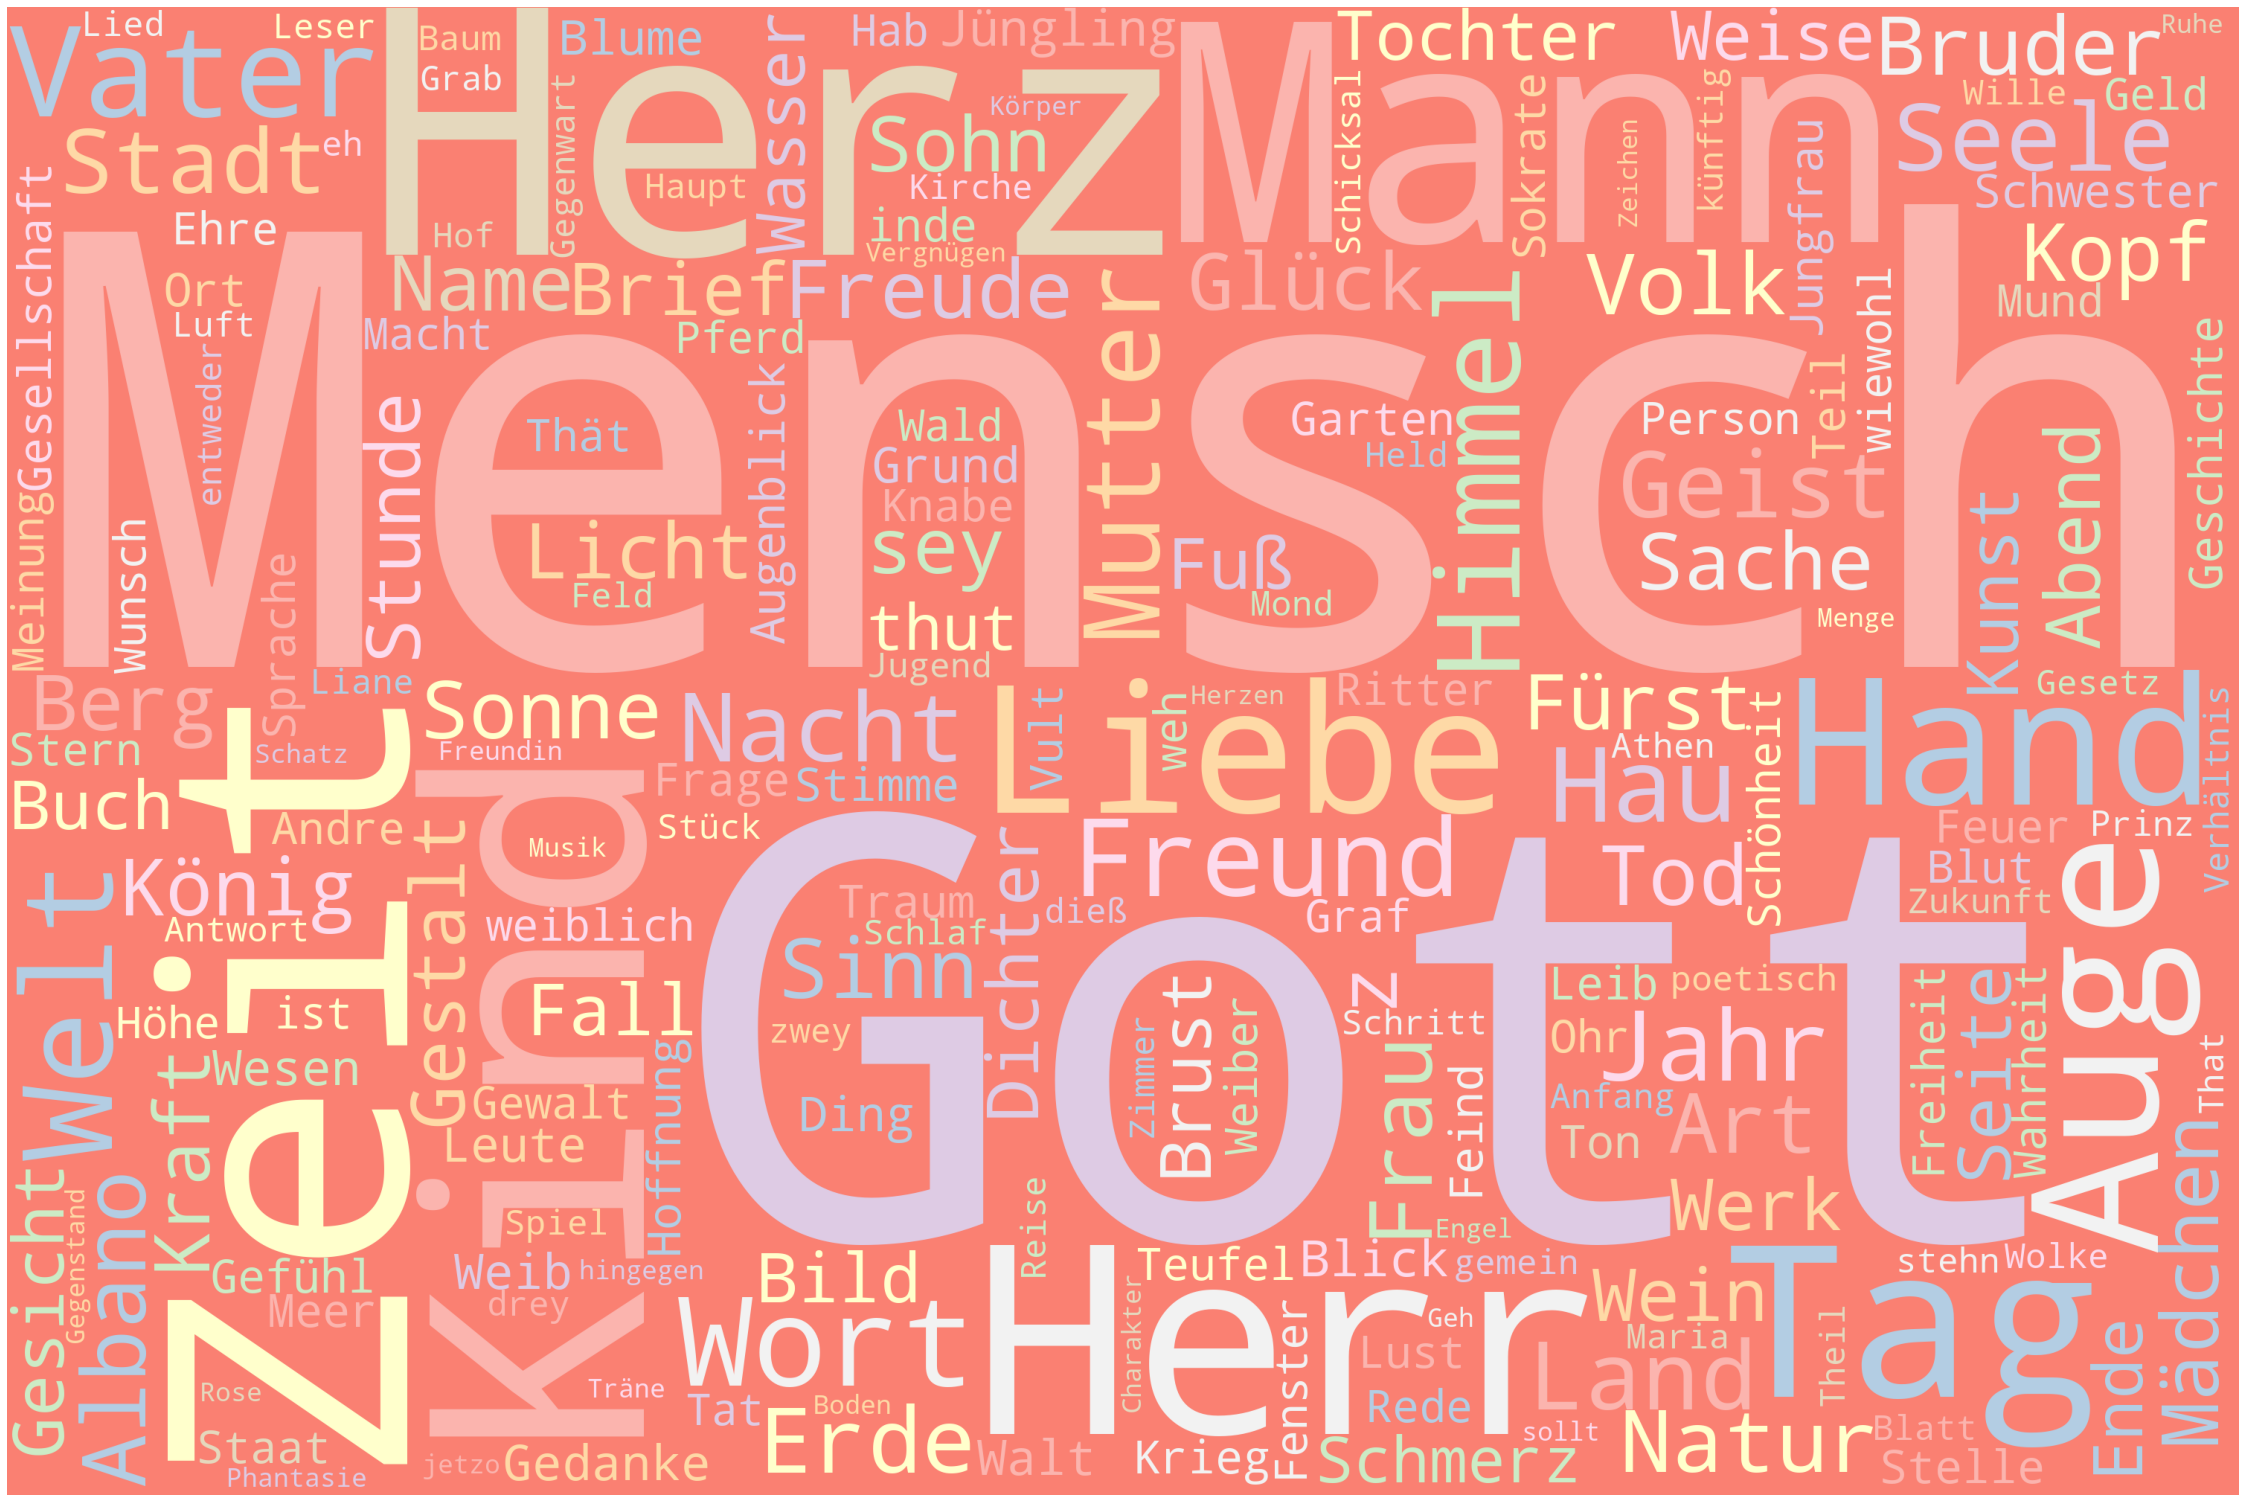

In [107]:
from wordcloud import WordCloud
wordcloud = WordCloud(width= 3000,
                      height = 2000,
                      random_state=1,
                      background_color='salmon',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = stopwords_most_common
                     ).generate(' '.join(lemma_1800))# Plot
plot_cloud(wordcloud)

In [68]:
my_file = open("data/stop_words_german.txt", "r", encoding='utf-8')
content = my_file.read()
#print(content)
stopwords_list = content.split("\n")
my_file.close()